# Fourier Transform (& wavelets)

Most scientific break throughs have occured by approaching problem from a different coordinate system. Fourier transform is a coordinate transform into harmonic (sin & cos) system. Fourier transform says any function can be approximated by an infinite number of sin and cosines of increasing frequency.

Fast Fourier Transform - how you efficiently compute a Fourier series on a computer. Modern digital communication is built on the Fast Fourier Transform.

In series, going to look at Fourier transforms for: 
- Function approximation
- Image compression
- Audio compression
- Denoising

For reference, knowing that a projection is the following integral $<f(x), g(x)> = \int f(x) \bar{g}(x) dx$ the Fourier series is defined as a projection onto an basis of infinite number sin and consines of $2 \pi $ frequency. 


### Notation \& definitions
$\hat{f}(\omega) = \mathcal{F(f(x))}$ - the Fourier transform of the function, $f(x)$. <br>
$f(x) = \mathcal{F^{-1}(\hat{f}(\omega))}$ - the inverFourier transform of the function, $\hat{f}(\omega)$.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

## Fourier series (video 2) 
https://www.youtube.com/watch?v=MB6XGQWLV04&list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC&index=2 <br>
Approximating a function, f(x) as $ f(x) = \frac{A_0}{2} + \sum^\infty_{k=1} (A_k cos(kx) + B_k sin(kx))$. Coefficients $A_0$, $A_k$ and $B_k$ need to be computed. Further, inputs into sin and cos are *2 $\pi$ periodic*.

$A_0 = <f,1(.)> * dx$ the projection onto a vector of ones.

The coefficients $A_k$ and $B_k$ are computed by the Hilbter space inner product of function f(x) with specific cosine or sin frequency. 
$$
\begin{align}
A_k &= \frac{1}{\pi} \int^\pi_{-\pi} f(x) cos(kx)dx \\
B_k &= \frac{1}{\pi} \int^\pi_{-\pi} f(x) sin(kx)dx \\
\end{align}
$$
Where the above can be rewritten as a projection of inner products: 
$$
\begin{align}
A_k &= \frac{1}{\pi} \int^\pi_{-\pi} f(x) cos(kx)dx = \frac{1}{||cos(kx)||^2} <f(x), cos(kx)>\\
B_k &= \frac{1}{\pi} \int^\pi_{-\pi} f(x) sin(kx)dx = \frac{1}{||sin(kx)||^2} <f(x), sin(kx)> \\
\end{align}
$$

Fourier series is just a representation of writing a function in orthogonal basis of sin's and cosine's.

<font color='red'>Show relation from function representation of Fourier series to projection onto basis to least squares coefficients.</font> 

## Fouerier series (video 3)
https://www.youtube.com/watch?v=Ud9Xtxsi2HI&list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC&index=3 <br>
An extension is made to the previous form of the projection where coefficients are calculated on $2\pi$ periodicity. Thus: 
$$
\begin{align} 
f(x) &= \frac{A_0}{2} + \sum^{\infty}_{k=1} (A_k cos(\frac{2\pi k x}{l}) + B_k sin(\frac{2\pi k x}{l})) \\
A_k &= \frac{2}{L}\int_{0}^L f(x)cos(\frac{2\pi k x}{l}) dx \\
B_k &= \frac{2}{L}\int_{0}^L f(x)sin(\frac{2\pi k x}{l}) dx \\
\end{align}
$$

<font color='red'> <b> Note: in the formulation above L is assumed to be the 'full wavelength' or 'full period'. This is important to ensure continuities at every period of function f, as $cos(\frac{2\pi k x}{l}) = cos(2\pi)$ and $sin(\frac{2\pi k x}{l} = sin(2\pi) when x = l, full wave length$ i.e. the value at the lower bound of period is equal to that of the upper bound of period (ensures no discontinuities),. Which under the Fourier series is continues for an infinite amount 'periods'/'cycle'. Fourier series coefficients can also be shown in the form below where the wave length/period, L, is halved, w, but provides the following simplification </b></font>

$$
\begin{align}
L &= 2w \\ 
f(x) &= \frac{A_0}{2} + \sum^{\infty}_{k=1} (A_k cos(\frac{2\pi k x}{l}) + B_k sin(\frac{2\pi k x}{l})) \\
A_k &= \frac{2}{2W}\int_{0}^L f(x)cos(\frac{2\pi k x}{2W}) dx = \frac{1}{W}\int_{0}^{2W} f(x)cos(\frac{\pi k x}{W}) dx \\
B_k &= \frac{2}{2W}\int_{0}^L f(x)sin(\frac{2\pi k x}{2W}) dx = \frac{1}{W}\int_{0}^{2W} f(x)sin(\frac{\pi k x}{W}) dx \\
\end{align}
$$
Note: the change in the bounds of integration and removal of 2's. 

In [ ]:
# Fourier series from discrete dot product 
plt.rcParams['figure.figsize'] = [12,6]

#set parameters for hat function 
L = np.pi
dx = 0.0001
# x = L * np.arange(-1 + dx, 1+dx, dx)
x = L * np.arange(0, 1+dx, dx)
n = len(x)
nquart = int(np.floor(n/4))


#create hat function
f = np.zeros_like(x)
f[nquart:nquart*2] =  (4/n)* np.arange(1,nquart+1)
f[nquart*2:nquart*3] =  np.ones(nquart) - (4/n)* np.arange(0,nquart)

#plot hat function
fig, ax = plt.subplots()
ax.plot(x,f, '-', color = 'k', LineWidth = 2)

# set colors 
name = 'Accent'
cmap = get_cmap('tab10')
colors = cmap.colors
ax.set_prop_cycle(color = colors)

#compute Fourier series
num_basis = 20

# compute coefficient for each basis function
A_0 = 2*np.sum(f * np.ones_like(x)) * dx
fFS = A_0/2

# use the dot product to get coefficients
A_k = np.zeros(num_basis)
B_k = np.zeros(num_basis)
for k in range(num_basis):
    A_k[k] = 2*np.sum(f * np.cos(2*np.pi*(k+1)*x/L)) * dx
    B_k[k] = 2*np.sum(f * np.sin(2*np.pi*(k+1)*x/L)) * dx
    
    # Use the coefficients to scale each of the basis functions
    fFS = fFS + A_k[k]*np.cos((2*np.pi * (k+1) * x)/L) + B_k[k]*np.sin((2*np.pi * (k+1) * x)/L)
    ax.plot(x,fFS, '-')

## Inner products in Hilbert Space (video 4)
https://www.youtube.com/watch?v=g-eNeXlZKAQ&list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC&index=4 <br>
Making equivalance from inner products of vectors and functions. Start with two functions, *f(x)* and *g(x)*, then the following projection holds $<f(x), g(x)> \Delta x = \int_a^b f(x) \bar{g}(x)dx$, where $\Delta x$ is a normalising constant. Similar to the inner product/cosine similarity metric then larger this projection the more similar the functions are. To show how this is similarity metric start by taking a vector of discrete, equidistant points such that each point on x is defined as $x_1, x_2, ... x_n$ where $\Delta x= \frac{x_n - x_1}{n-1}$. 

The discrete dot product between f(x) and g(x) would then become:
$$
f = \begin{bmatrix} f(x_1) \\ f(x_2) \\ \dots \\ f(x_n) \end{bmatrix}
g = \begin{bmatrix} g(x_1) \\ g(x_2) \\ \dots \\ g(x_n) \end{bmatrix}
$$

To inner product/projection then becomes $<f(x), g(x)> = g^tf = \sum^n_{k=1} f(x_k)\bar{g}(x)$. However, note this isn't normalised for the number of data points in discretisation process, the following manipulation is made $<f(x), g(x)> \Delta x = \sum^n_{k=1} f(x_k)\bar{g}(x) \Delta x$ WHICH IS THE APPROXIMATION TO THE REIMANN INTEGRAL AS $\lim{\Delta x\rightarrow \infty}$.

## Complex Fourier Series
https://www.youtube.com/watch?v=4cfctnaHyFM&list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC&index=5 <br>
Reiterating the a complex conjugate projection is $<f(x), g(x)> = \int_a^b f(x) \bar{g}(x)dx$ then we use this to extend the Fourier series to the complex realm. In the complex domain, using Euler's formula $e^{ikx} = cos(kx) + isin(kx)$ which yields the following sum $f(x) = \sum ^\infty_{k=1} c_k e^{ikx} = \sum ^\infty_{k=1} (a_k + ib_k)(cos(kx) + isin(kx))$. These functions *for integer vectors, k*, are orthogonal. To show this define $e^{ikx} = cos(kx) + isin(kx) = \psi_k$ then for the projection $<\psi_j, \psi_k>$ = 0 unless k = j. This is because $<\psi_j, \psi_k> = \int^\pi_{-\pi}e^{ijx}e^{-ikx} = \int^\pi_{-\pi}e^{ix (j - k)} = \frac{1}{i(j-k)} e^{ix (j - k)} |^\pi_{-\pi}$ which yields: 
$$
= \begin{cases}
0 & if j \ne k \\
2\pi & if j = k \\
\end{cases} 
$$

Showing the projection is zero unless the projections are j = k shows that each function is an orthogonal projection.

Note: the conversion of $<\psi_j, \psi_k> = \int^\pi_{-\pi}e^{ijx}e^{-ikx}$ due to the complex conjugate required for complex projections.

Further it can then be shown that f(x) can be approximated as $f(x) = \frac{1}{2\pi}\sum^\infty_{k=1} <f(x), \psi_k> \psi_k$ where $<f(x), \psi_k>$ is the projection onto the Fourier series and $\psi_k$ is the basis vector $\psi_k = e^{ikx}$. The projection $<f(x), \psi_k>$ = $\frac{1}{2L} \int^L_{-L}f(x)e^{\frac{-ikx}{L}} dx$

## The Fourier Transform
https://www.youtube.com/watch?v=jVYs-GTqm5U&list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC&index=10 <br>
Focuses on extending from the periodic domain of the **Fourier series** to the entire continuous domain $-\infty$ to $\infty$ of the **Fourier transform**. A Fourier transform can be thought of as a Fourier series where outside the periodic funciton the Fourier transform converges to zero (does not repeat). 


Starting with 
$$ w_k = \frac{k\pi}{L} = k \Delta w$$ 
where
$$ \Delta w = \frac{\pi}{L}$$
and remembering that
$$f(x) = \sum^\infty_{k=1} c_ke^{\frac{ikx}{L}} = \sum^\infty_{k=1} \frac{1}{2L} \int^L_{-L}f(x)e^{\frac{-ik\pi x}{L}} dx e^{\frac{ik\pi x}{L}} $$

Then $lim_{\Delta L \rightarrow \infty} \Delta w \rightarrow 0$ yields the following for f(x): 


$$
\begin{align}
f(x)&= lim_{\Delta L \rightarrow \infty} \sum^\infty_{k=- \infty} \frac{\Delta w}{2\pi} \int^L_{-L}f(x)e^{\frac{-ik\pi x}{L}} dx e^{\frac{ik\pi x}{L}} \\
&= lim_{\Delta L \rightarrow \infty} \sum^\infty_{k=- \infty} \frac{\Delta w}{2\pi} \int^L_{-L}f(x)e^{-i \Delta wx} dx e^{i \Delta wx}\\
&= lim_{\Delta L \rightarrow \infty} \sum^\infty_{k=- \infty} \frac{\Delta w}{2\pi} \int^{\frac{\pi}{\Delta w}}_{-\frac{\pi}{\Delta w}}f(x)e^{-i \Delta wx} dx e^{i \Delta wx}\\
&= \color{red}{\int^\infty_{-\infty} \frac{\Delta w}{2\pi}} \color{blue}{ \int^\infty_{-\infty}f(x)e^{-i \Delta wx} dx e^{i \Delta wx}} \color{red}{dw}\\
\end{align} \\
$$ 

where the Fourier transform is: 
$$ \color{blue}{\int^\infty_{-\infty}f(x)e^{i \Delta wx} dx e^{-i \Delta wx}}$$ 

and the **inverse Fourier transform** is: 
$$ \color{red}{\int^\infty_{-\infty} \frac{\Delta w}{2\pi}} \color{blue}{\dots} \color{red}{e^{i \Delta wx}}$$
dw
Fourier transforms have propperties which are beneficial when solving differential equations, then can be transformed back with inverse Fourier transform.

## The Fourier Transform and Derivatives
https://www.youtube.com/watch?v=d5d0ORQHNYs&list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC&index=11 <br>
Taking the Fourier transform of the derivative of a function simply results in the $i \omega * \mathcal{F}(f(x))$. This is important, as sometimes the derivate, $\frac{df}{dx}$ is more accurately modelled in Fourier domain which is called the spectral derivative and can be more accurate than traditional finite difference, forward-backward difference etc. in time domain. Further, converting to Fourier domain will greatly assist in differential equation applications: 

Proving Fourier transform of derivative: 
$$
\begin{align}
\mathcal{F}(\frac{df}{dx}) &=  \int^\infty_{-\infty}\frac{df}{dx}e^{-i \omega x} dx \\
& \text{through integration by parts}\\
&= vu - \int v du dx \\
&= f(x)e^{-i \omega x}|^{\infty}_{-\infty} - \int^\infty_{-\infty} f(x) (-i \omega) e^{-i \omega x} dx \\
& \text{since limit of f(x) must go 0 as } L \rightarrow \pm \infty\\
&= 0 - \int^\infty_{-\infty} f(x) (-i \omega) e^{-i \omega x} dx \\
&= (i \omega)\int^\infty_{-\infty} f(x) e^{-i \omega x} dx \\
\mathcal{F}(\frac{df}{dx}) &= (i\omega)\mathcal{F}(f(x))\\
\end{align}
$$

Further this allows PDEs to be converted into ODEs. i.e. the heat equation exhibits the following PDE: 
$$ u_{tt} = cu_{xx} \xrightarrow[]{\mathcal{F} \text{ twice}} \hat{u}_{tt} = -\omega \hat{u}$$
where the right hand side is an ODE. 

## The Fourier Transform and Convolution Integrals
https://www.youtube.com/watch?v=mOiY1fOROOg&list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC&index=12 <br> 
Convolutions are defined by (f\*g) = $\int^\infty_{-\infty} f(x-\omega)g(\omega)d\omega$ and are notoriously difficult to compute. One method to circumvent the need to compute convolutions is to take the Fourier transforms. As will be shown below, convolutions become relatively easier on the Fourier domain as convolutions become products. 

$$\mathcal{F}(f*g) = \mathcal{F}(f)\mathcal{F}(g) = \hat{f} \hat{g}$$

Then we have the following: 
$$
\begin{align} 
\hat{f}(x)\hat{g}(x) &= \mathcal{F}(f*g)\\
&= \frac{1}{2\pi} \int^\infty_{-\infty}\hat{f}(\omega)\hat{g}(\omega)e^{i \omega x}d\omega\\
&= \frac{1}{2\pi} \int^\infty_{-\infty}\hat{f}(\omega)\int^\infty_{-\infty}g(y) e^{-i\omega y}dy e^{i\omega x}d\omega\\
&= \int^\infty_{-\infty}g(y)\frac{1}{2\pi} \int^\infty_{-\infty}\hat{f}(\omega) e^{i\omega x -y} d\omega dy\\
&= \int^{\infty}_{-\infty}g(y)f(x-y)dy\\
\end{align}
$$

## Application of Fourier transform: heat equation
The heat equation was what Fourier was trying to solved when he derived the Fourier transform. The function for the Fourier transform u(x,0) converges to zero on $\pm \infty $ domain. Starting with heat equation PDE, $u_t = \omega^2 u_{xx}$. Starting with the heat equation, yields: 
$$
\begin{align}
\mathcal{F}(u(x,t)) &= \hat{u}(\omega, t) \\ 
& \text{apply property of derivative of Fourier transform, twice} \\ 
\mathcal{F}(u_x) &= i \omega \hat{u}(\omega, t) \\ 
\mathcal{F}(u_{xx}) &= - \omega^2 \hat{u}(\omega, t) \\ 
\end{align}
$$

## Discerte Fourier Transform
https://www.youtube.com/watch?v=nl9TZanwbBk&list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC&index=15 <br> 
The concept of the Discrete Fourier Transform is a foundational concept of the Fast Fourier Transform, the most revolutionary algorithm of the 21st Century. The Discrete Fourier Transform can be thought of as a Fourier Series on a data set. The DFT approximates data!

The Discrete Fourier transform is defined by: 
$$ \hat{f}_k = \sum^{n-1}_{j=0}f_k e^{\frac{-2\pi jk}{n}}$$

# Computing the DFT Matrix 

Note: you never actually compute the DFT you use the FFT. 

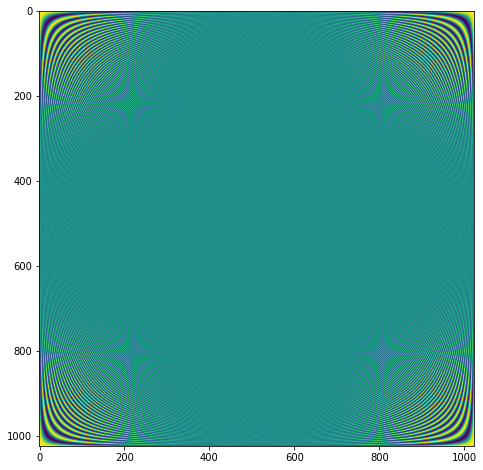

In [5]:
plt.rcParams['figure.figsize'] = [8, 8]

n = 1024
l, k = np.meshgrid(np.arange(n) , np.arange(n))
w = np.exp(-2 * np.pi * 1j / n)
DFT = np.power(w, l * k)
DFT = np.real(DFT)

plt.imshow(DFT)
plt.show()

## The Fast Fourier transform 
https://www.youtube.com/watch?v=E8HeD-MUrjY&list=PLMrJAkhIeNNT_Xh3Oy0Y4LTj0Oxo8GqsC&index=17 <br> 
A computational efficient algorithm to calculate the Discrete Fourier transform, is one of the most important algorithms ever credit especially in the field of digital processing and compressing. Computationally the Discrete Fourier transform is $O(n^2)$ whereas the Fast Fourier transform is $O(n \log(n))$. 

Uses: 
    1. Derivatives to solve PDEs
    2. Denoise data isolate frequencies
    3. Analysis of data
    4. Audio and image compression

How does the Fast Fourier transform increase computation?<br>
Start with the general form of the Fourier transformation (for a 1024 pixel image, arbitrary):
$$ \hat{f} = F_{1024} f = \begin{bmatrix} I_512 & -D_{512} \\ I_{512} & -D_{512} \end{bmatrix} \begin{bmatrix} F_{512} & 0 \\ 0 & F_{512} \end{bmatrix} \begin{bmatrix} f_{even} \\ f_{odd} \end{bmatrix}$$

Where the elements $I_x$ and $D_x$ in $\begin{bmatrix} I_512 & -D_{512} \\ I_{512} & -D_{512} \end{bmatrix}$ are the identity and diagonal matrix $
    \begin{bmatrix} 
        1 & 0 & \dots & 0 \\  
        0 & \omega & \dots & 0 \\
        \vdots & \ddots & \ddots & \vdots \\
        0 & 0 & 0 & \omega^{n-1} \\ 
    \end{bmatrix}$
noting that both of these matrices are **diagonal and therefore exetremely computationally efficient to compute**. 

Further there is a recursive pattern, where by the resulting matrices, $\begin{bmatrix} F_{512} & 0 \\ 0 & F_{512} \end{bmatrix}$ can then be further transformed by the FFT to  further increase efficiency. This can be extended recursively until there is a dimension of 2, an odd and even cofficient to be split. It can be shown that formulating a matrix in $2^n$ dimension by using zero-padding and then applying the recursive pattern is more computationally efficient than applying to matrix of dimensions which are not of $2^n$. 

## Computing derivatives with the FFT
Previously looked at how data can be transformed into Fourier coefficients. Now we look at approximating derivatives using Fourier transform (spectral) derivative and then compare against finite difference derivative, $f'_k = \frac{f_{k+1} - f_k}{\Delta x}$. The derivatives in the continuous space, yields $\mathcal{F}(\frac{df}{dx}) = i \kappa \mathcal{F}(f(x)) = i \kappa \hat{f}(x)$ where $\kappa = \frac{2\pi}{L}$. 

In [19]:
n = 128
L = 30
dx = L/n
x = np.arange(-L/2, L/2, dx, dtype = "complex_")

# define function 
f = np.cos(x) * np.exp(-np.power(x,2)/25)
# compute analytical derivative
df = -(np.sin(x) * np.exp(-np.power(x,2)/25)) - (2/25)*x*f

In [20]:
# Fourier (spectral derivative)
fhat = np.fft.fft(f)
kappa = (2*np.pi/L)*np.arange(-n/2, n/2)
kappa = np.fft.fftshift(kappa)
# definition of Fourier transform of derivative
dfhat = (1j) * kappa * fhat
dfFFT = np.fft.ifft(dfhat)

/Users/jacklee-kopij/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/Users/jacklee-kopij/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


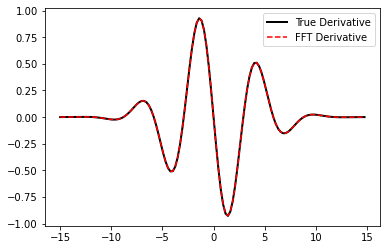

In [21]:
plt.plot(x, df.real, color='k',linewidth=2,label='True Derivative')
plt.plot(x, dfFFT.real, "--", color = "r", linewidth=1.5,label='FFT Derivative')
plt.legend()
plt.show()

## Solving PDEs with Fourier transform
The derivative properties of Fourier transforms can assist in simplifying the solving of PDEs. An example is the heat equation $u_t = \alpha^2 u_{xx}$. Instead of solving this PDE directly a more computationally efficient method is to:
1. Twice take the Fourier Transform, yielding $\hat{u}_t = \alpha^2 \kappa^2 \hat{u}$. Yields n decoupled ODEs, one for each $\kappa_j$ 
2. Solve using ODE integrator 
3. Inverse Fourier transform solution 

Note: $\hat{u}_t = \alpha^2 \kappa^2 \hat{u}$ can be rearranged into an eigenvector/value form  $\hat{u}_t - \alpha^2 \kappa^2 \hat{u} = (M - \alpha^2 \kappa^2 I) \hat{u} = 0 $ which is consistent with physics where by higher order frequencies (heat noise) dies off faster than lower frequencies. 